Name : K.Shahana

Degree : B.Tech

Task Name : Stock  Prediction

To Import the Libraries

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as data
import sklearn as sk


In [7]:
import yfinance as yf
import pandas as pd

stock_symbol = 'AAPL'
start = '2010-01-01'
end = '2020-12-31'
df = yf.download(stock_symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [51]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200806,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189514,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028397,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100


To Reset the Index Position

In [8]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454507,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


Remove unwanted Columns

In [9]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


After Removing Unwanted Columns

In [10]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


History of Close Price

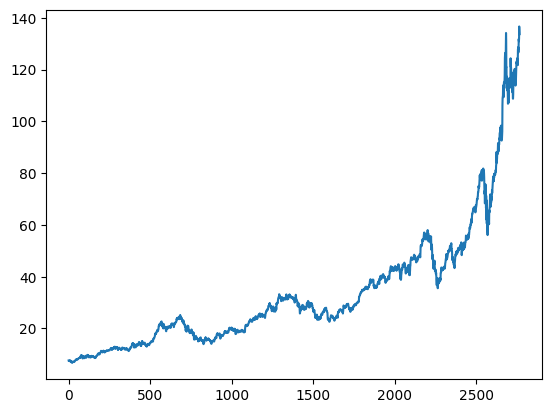

In [11]:
plt.plot(df['Close'])

Find Moving Average for 100days

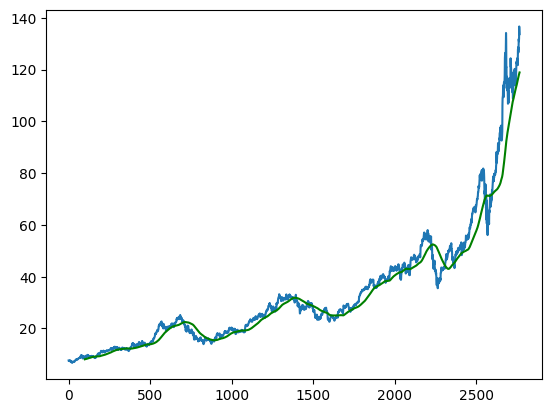

In [12]:
moving_average_100days=df.Close.rolling(100).mean()
plt.plot(df['Close'])
plt.plot(moving_average_100days,'g')
plt.show()

Find Moving Average for 200days

In [13]:
moving_average_200days = df['Close'].rolling(200).mean()
moving_average_200days

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

Closing Prive vs Time chart with 100 & 200 days Moving Average

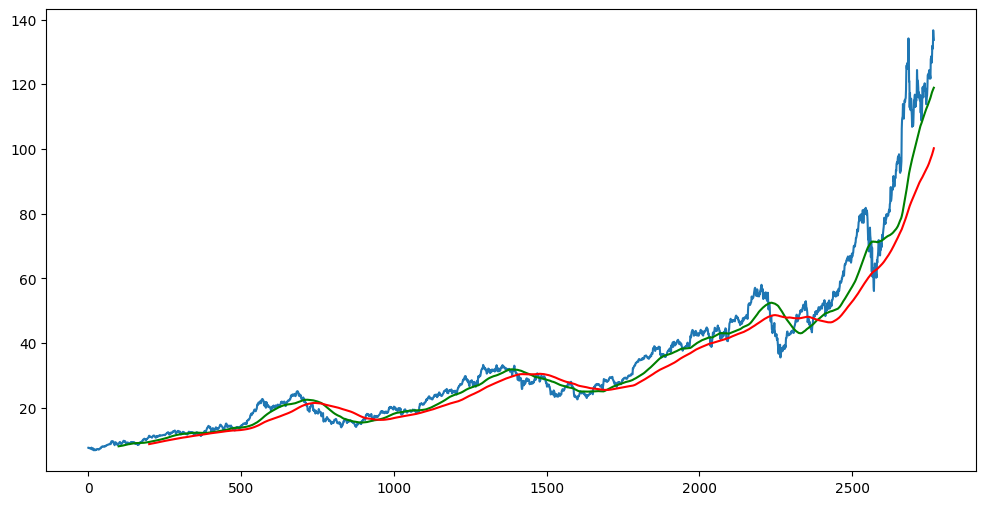

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(moving_average_100days,'g')
plt.plot(moving_average_200days,'r')
plt.show()

In [15]:
df.shape

(2768, 5)

Splitting Data into Training and Testing

In [16]:
training_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
print(training_data.shape)

(1937, 1)


In [17]:
testing_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(testing_data.shape)


(831, 1)


In [18]:
training_data.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [19]:
testing_data.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


Scale the data to be between 0 and 1 using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
array_training_data=scaler.fit_transform(training_data)
array_training_data

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [29]:
array_testing_data=scaler.fit_transform(testing_data)
array_testing_data

array([[0.04315691],
       [0.03977061],
       [0.04372544],
       [0.0407346 ],
       [0.0408829 ],
       [0.03430804],
       [0.02768371],
       [0.02397607],
       [0.02066392],
       [0.02706577],
       [0.02975997],
       [0.02741181],
       [0.02948808],
       [0.02872184],
       [0.03037791],
       [0.02790615],
       [0.03262723],
       [0.03240478],
       [0.03373951],
       [0.03388781],
       [0.03549448],
       [0.034135  ],
       [0.03658206],
       [0.04372544],
       [0.04518377],
       [0.04342881],
       [0.03408556],
       [0.03475294],
       [0.0345552 ],
       [0.03685395],
       [0.03514843],
       [0.03762019],
       [0.05156092],
       [0.06063227],
       [0.06636674],
       [0.06105247],
       [0.06406802],
       [0.07491904],
       [0.07924462],
       [0.0806288 ],
       [0.08416344],
       [0.0832736 ],
       [0.08028276],
       [0.07855253],
       [0.07205179],
       [0.06646563],
       [0.07145859],
       [0.069

Define X_train and Y_train

In [50]:
x_train=[]
y_train=[]
for i in range(100,array_training_data.shape[0]):
  x_train.append(array_training_data[i-100:i])
  y_train.append(array_training_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

Machine Learning Model(by using LSTM )

In [49]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


Summary of ML Model

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - loss: 0.1136
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0099
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0080
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0079
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0068
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0065
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0070
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0056
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0050
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 0.0059
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.0058
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0049
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0049
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0053
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - l

In [47]:
model.save('my_model.keras')

In [32]:
testing_data.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [33]:
training_data.tail(100)

,Close
1837,35.567501
1838,35.910000
1839,36.132500
1840,35.919998
1841,35.947498
...,...
1932,40.477501
1933,40.314999
1934,39.657501
1935,40.375000


In [34]:
past_100days=training_data.tail(100)

In [35]:
import pandas as pd

final_df = pd.concat([past_100days, testing_data], ignore_index=True)

In [48]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Scalerform_input=scaler.fit_transform(final_df)
Scalerform_input

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [38]:
import numpy as np

np.set_printoptions(suppress=True)
print(Scalerform_input)


[[0.00019775]
 [0.00358404]
 [0.00578391]
 [0.0036829 ]
 [0.00395479]
 [0.00360875]
 [0.01085103]
 [0.01314974]
 [0.01203746]
 [0.01072743]
 [0.01673383]
 [0.02674442]
 [0.02916678]
 [0.02736236]
 [0.02906789]
 [0.03438219]
 [0.03339347]
 [0.03282497]
 [0.01992238]
 [0.02558269]
 [0.02686802]
 [0.02916678]
 [0.02869714]
 [0.02756011]
 [0.02887014]
 [0.0282275 ]
 [0.0283758 ]
 [0.02612648]
 [0.02716462]
 [0.03277553]
 [0.02901844]
 [0.03030377]
 [0.03257778]
 [0.03163854]
 [0.01678323]
 [0.00798377]
 [0.01087573]
 [0.00734113]
 [0.00519067]
 [0.00019775]
 [0.01025779]
 [0.00697034]
 [0.00909606]
 [0.00850286]
 [0.01010949]
 [0.0089725 ]
 [0.00380649]
 [0.00899721]
 [0.0036829 ]
 [0.00452333]
 [0.003238  ]
 [0.00469633]
 [0.00133473]
 [0.00491878]
 [0.00709394]
 [0.00825567]
 [0.00877476]
 [0.01379243]
 [0.01693153]
 [0.01821686]
 [0.01950219]
 [0.02182565]
 [0.02014483]
 [0.01997183]
 [0.02447041]
 [0.02607708]
 [0.02785675]
 [0.02068862]
 [0.01806856]
 [0.01616529]
 [0.01942804]
 [0.03

In [39]:
Scalerform_input.shape

(931, 1)

Define x_test,y_test

In [40]:
x_test=[]
y_test=[]
for i in range(100,Scalerform_input.shape[0]):
  x_test.append(Scalerform_input[i-100:i])
  y_test.append(Scalerform_input[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape,y_test.shape

((831, 100, 1), (831,))

Making Prediction

In [41]:
y_pred=model.predict(x_test)
y_pred.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


(831, 1)

In [42]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [43]:
y_pred

array([[0.12454598],
       [0.12470801],
       [0.12478659],
       [0.1247789 ],
       [0.12470086],
       [0.12455846],
       [0.12436053],
       [0.12409551],
       [0.12374204],
       [0.12328465],
       [0.12272404],
       [0.12209204],
       [0.12142745],
       [0.12076852],
       [0.12014982],
       [0.11959209],
       [0.11911096],
       [0.11870587],
       [0.11838752],
       [0.11815549],
       [0.11800751],
       [0.11793555],
       [0.11793217],
       [0.11797783],
       [0.11806771],
       [0.11822006],
       [0.11844419],
       [0.11872925],
       [0.11902821],
       [0.11930826],
       [0.1195461 ],
       [0.11973596],
       [0.11987354],
       [0.11997621],
       [0.12010977],
       [0.12035003],
       [0.12074322],
       [0.12129867],
       [0.12202437],
       [0.12294526],
       [0.12407081],
       [0.12539177],
       [0.12688638],
       [0.12850596],
       [0.13018012],
       [0.13182673],
       [0.1333515 ],
       [0.134

In [44]:
scaler.scale_

array([0.00988704])

In [45]:
f=1/0.00988704
y_test=y_test*f
y_pred=y_pred*f

Original Vs Prediction

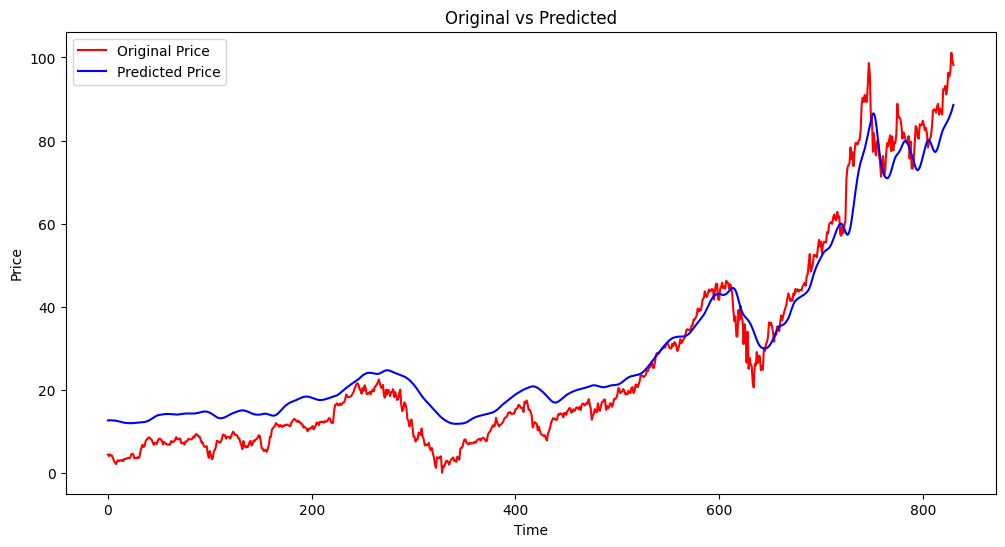

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'r',label='Original Price')
plt.plot(y_pred,'b',label='Predicted Price')
plt.title('Original vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()